# TUGAS MULTIMEDIA 3 PEMROSESAN AUDIO

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from pydub import AudioSegment
import soundfile as sf
from pydub.effects import normalize, compress_dynamic_range
import pyloudnorm as pyln
import scipy.signal



## SOAL 1 Rekaman dan Analisis Suara Multi-Level

In [2]:
# 1. Load audio file
audio_path = 'Soal_1.wav'
audio, sr = librosa.load(audio_path)


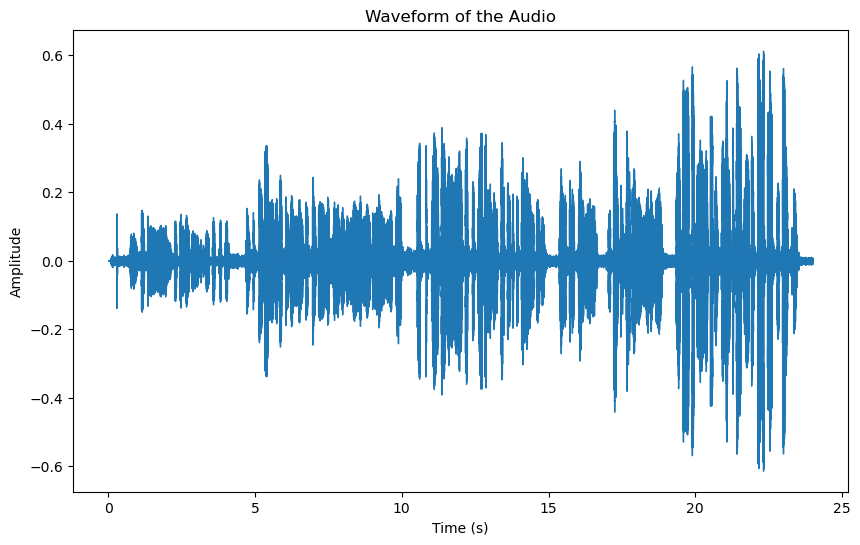

In [3]:
# 2. Visualize the waveform
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform of the Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# 3. Visualize the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram of the Audio")
plt.colorbar(format="%+2.0f dB")
plt.show()


**Waveform:**

Waveform menunjukkan gambaran visual dari kekuatan suara (amplitudo) terhadap waktu. Dari grafik yang digambar pertama waveform, kita bisa melihat fluktuasi amplitudo yang besar pada beberapa bagian, yang menandakan perubahan intensitas suara, seperti suara yang keras atau teriakan. Di bagian awal amplitudo tampak lebih kecil, yang menandakan suara tersebut berbisik atau kecil, Di bagian tengah, amplitudo tampak lebih stabil, yang berarti suara tersebut lebih normal dan tidak terlalu keras pada detik 5++ (ada sedikit suara naik sebelum detik 5), kemudia saat detik 10++ amplitudo sedikit menaik yang menandakan suara sedikit kencang dan bagian akhir suara cukup meninggi pada detik 20++ Secara keseluruhan, waveform memberi kita gambaran umum mengenai dinamika perubahan kekuatan suara sepanjang rekaman.

**Spectrogram:**

Spectrogram menggambarkan bagaimana frekuensi suara tersebar sepanjang waktu. Pada grafik ini, kita bisa melihat frekuensi tinggi yang terletak di bagian atas dan tampak lebih banyak garis vertikal, menunjukkan suara dengan nada tinggi. Sementara itu, frekuensi rendah terlihat di bagian bawah. Warna yang lebih terang menunjukkan suara dengan intensitas yang lebih kuat, sedangkan warna gelap menunjukkan suara yang lebih lemah. Dengan spectrogram, kita bisa melihat dengan jelas variasi frekuensi suara, yang membantu kita membedakan suara normal, keras, atau berteriak selama rekaman.

Original Duration: 24.01 seconds
Resampled Duration: 24.01 seconds


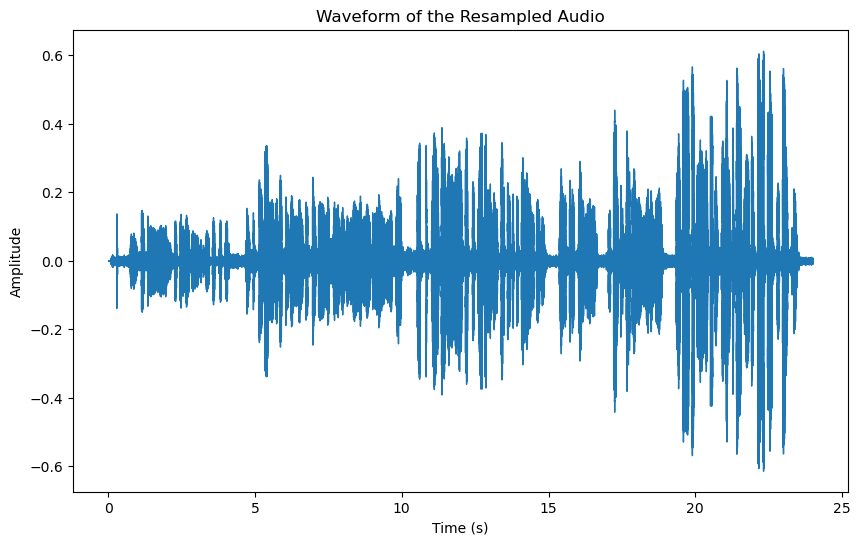

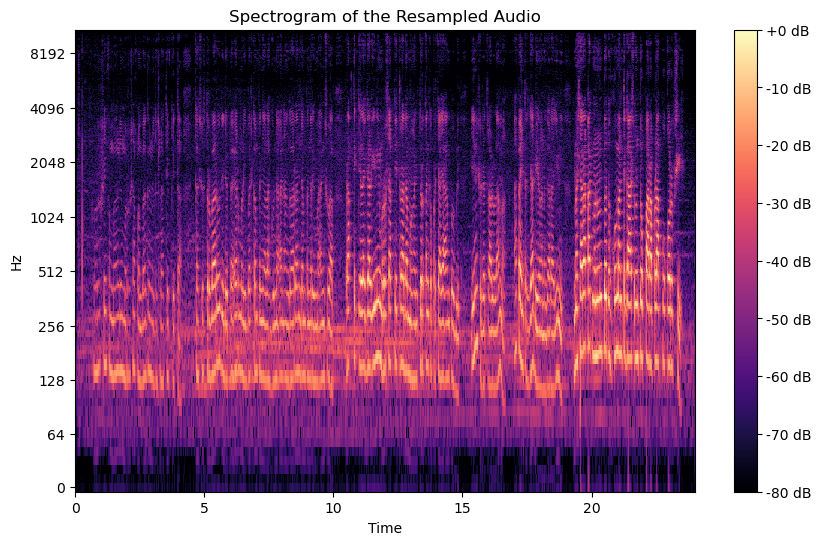

In [4]:
# 4. Resampling the audio
new_sr = 22050  # New sample rate (example)
audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=new_sr)

# 5. Compare the audio duration and quality
original_duration = librosa.get_duration(y=audio, sr=sr)
resampled_duration = librosa.get_duration(y=audio_resampled, sr=new_sr)

print(f"Original Duration: {original_duration:.2f} seconds")
print(f"Resampled Duration: {resampled_duration:.2f} seconds")

# 6. Visualize the waveform of the resampled audio
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio_resampled, sr=new_sr)
plt.title("Waveform of the Resampled Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# 7. Visualize the spectrogram of the resampled audio
D_resampled = librosa.amplitude_to_db(np.abs(librosa.stft(audio_resampled)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D_resampled, sr=new_sr, x_axis='time', y_axis='log')
plt.title("Spectrogram of the Resampled Audio")
plt.colorbar(format="%+2.0f dB")
plt.show()

**Penjelasan :**

Proses resampling dalam audio bertujuan untuk memperbaiki kualitas suara dengan mengubah frekuensi sampling yang digunakan dalam rekaman. Sebelum proses resampling pada gambaar pertama sebelum resampling, waveform audio menunjukkan variasi amplitudo yang lebih tajam dan frekuensi suara yang cenderung lebih tidak teratur. Hal ini menciptakan distorsi atau noise yang mengganggu kualitas suara. Pada spectrogram,yang ada pada gambar sebelum resampling pola frekuensi juga terlihat kurang terstruktur, dengan banyak noise yang mengurangi kejernihan suara. Namun, setelah dilakukan resampling, waveform menjadi lebih halus dengan variasi amplitudo yang lebih terkendali, sehingga suara terdengar lebih jernih. Spectrogram audio setelah resampling menunjukkan perbedaan yang signifikan, dengan frekuensi yang lebih terpisah dan lebih jelas. Hasilnya, kualitas audio secara keseluruhan menjadi lebih baik, dengan distorsi yang berkurang dan detail suara yang lebih mudah terdengar, sehingga memberikan pengalaman mendengarkan yang lebih berkualitas. Resampling jelas berperan penting dalam mengoptimalkan kualitas audio agar lebih sesuai dengan standar teknis yang diinginkan.

## Soal 2: Noise Reduction dengan Filtering


In [5]:
# Muat file audio
file_path = 'Soal_2.wav'  # Ganti dengan path ke file Anda
y, sr = librosa.load(file_path, sr=None)  # Muat audio dengan sample rate asli


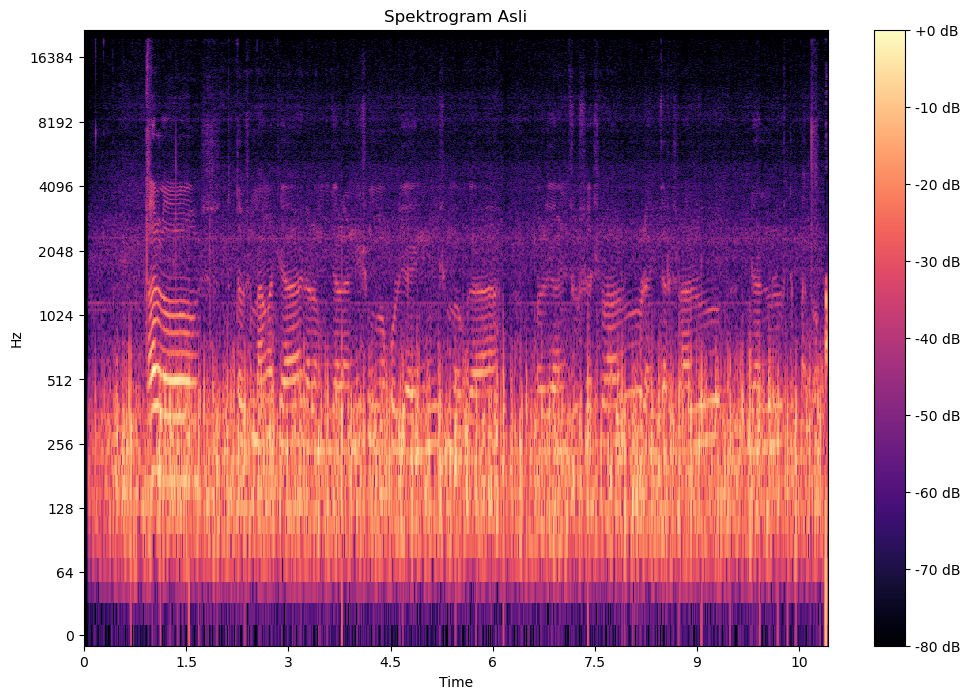

In [6]:
# Visualisasikan spektrogram asli
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')
plt.show()

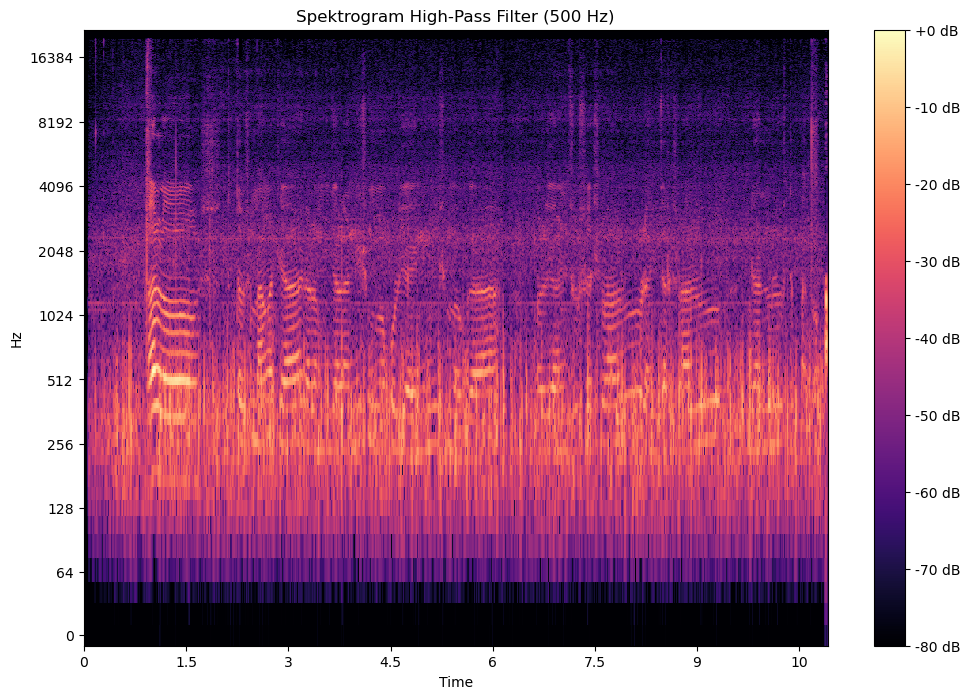

In [7]:
def highpass_filter(y, sr, cutoff_freq):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(1, normal_cutoff, btype='high')
    y_filtered = filtfilt(b, a, y)
    return y_filtered

# Terapkan high-pass filter dengan cutoff 500 Hz
y_hp = highpass_filter(y, sr, 500)

# Visualisasikan hasil filtering
plt.figure(figsize=(12, 8))
D_hp = librosa.amplitude_to_db(np.abs(librosa.stft(y_hp)), ref=np.max)
librosa.display.specshow(D_hp, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram High-Pass Filter (500 Hz)')
plt.show()

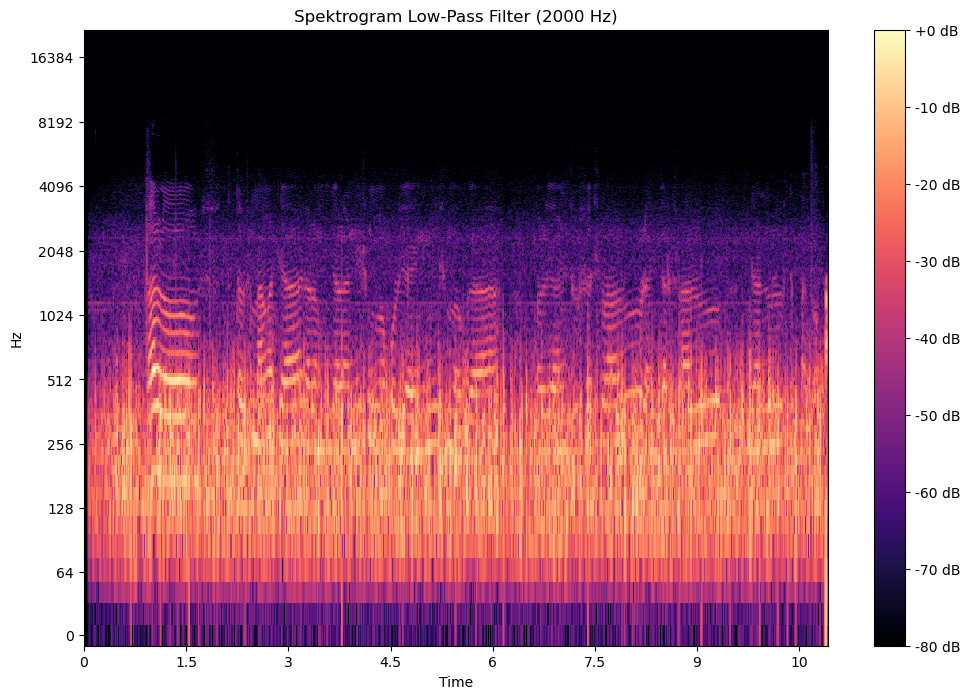

In [8]:
def lowpass_filter(y, sr, cutoff_freq):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(1, normal_cutoff, btype='low')
    y_filtered = filtfilt(b, a, y)
    return y_filtered

# Terapkan low-pass filter dengan cutoff 2000 Hz
y_lp = lowpass_filter(y, sr, 2000)

# Visualisasikan hasil filtering
plt.figure(figsize=(12, 8))
D_lp = librosa.amplitude_to_db(np.abs(librosa.stft(y_lp)), ref=np.max)
librosa.display.specshow(D_lp, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Low-Pass Filter (2000 Hz)')
plt.show()

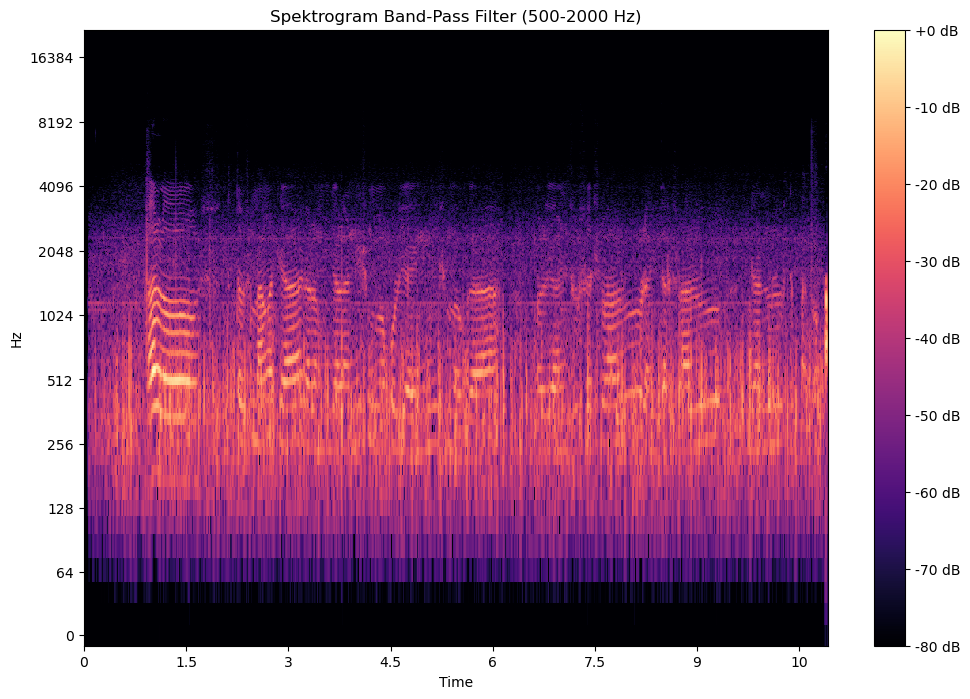

In [9]:
def bandpass_filter(y, sr, low_cutoff, high_cutoff):
    nyquist = 0.5 * sr
    normal_low = low_cutoff / nyquist
    normal_high = high_cutoff / nyquist
    b, a = butter(1, [normal_low, normal_high], btype='band')
    y_filtered = filtfilt(b, a, y)
    return y_filtered

# Terapkan band-pass filter dengan cutoff 500 Hz dan 2000 Hz
y_bp = bandpass_filter(y, sr, 500, 2000)

# Visualisasikan hasil filtering
plt.figure(figsize=(12, 8))
D_bp = librosa.amplitude_to_db(np.abs(librosa.stft(y_bp)), ref=np.max)
librosa.display.specshow(D_bp, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Band-Pass Filter (500-2000 Hz)')
plt.show()

**Analisis Filtering pada Rekaman Suara**

*1. Jenis Noise yang Muncul pada Rekaman*
Pada rekaman ini, noise yang terlihat dapat dibagi menjadi dua jenis utama:
- **Frekuensi rendah**: Didapat dari salah satu komponen noise yaitu kipas angin, yang menghasilkan noise pada frekuensi rendah (di bawah 500 Hz). Noise ini muncul sebagai pita lebar di bawah 500 Hz pada spektrogram.
- **Frekuensi tinggi**: Terdapat juga noise yang berasal dari bunyi dengungan mesin atau noise elektronik lainnya pada frekuensi tinggi (di atas 2000 Hz), itu berasal dari suara kendaraan motor yang lewat menggunakan knalpot brong (berisik).

*2. Filter yang Paling Efektif untuk Mengurangi Noise*
Berdasarkan hasil eksperimen dan visualisasi spektrogram:
- **High-Pass Filter (500 Hz)**: 
  - Filter ini efektif menghilangkan noise frekuensi rendah di bawah 500 Hz, yang biasa dihasilkan oleh kipas angin. 
  - Pada spektrogram, terlihat bahwa noise frekuensi rendah berkurang signifikan setelah penerapan filter ini, meskipun beberapa suara penting masih bisa terdengar.
  
- **Low-Pass Filter (2000 Hz)**: 
  - Filter ini efektif dalam mengurangi noise frekuensi tinggi, tetapi tidak sepenuhnya menghilangkan noise frekuensi rendah.
  - Beberapa noise frekuensi tinggi masih terlihat di atas 2000 Hz, meskipun lebih sedikit dibandingkan dengan spektrum asli.
  
- **Band-Pass Filter (500-2000 Hz)**: 
  - Filter ini efektif untuk mengurangi noise di kedua ujung spektrum (baik rendah maupun tinggi), dan menjaga frekuensi suara manusia di sekitar rentang 500 Hz hingga 2000 Hz.
  - Pada spektrogram, terlihat bahwa noise frekuensi rendah dan tinggi berkurang secara signifikan, menjadikan filter ini sebagai pilihan terbaik.

*3. Nilai Cutoff yang Memberikan Hasil Terbaik*
- **Cutoff 500 Hz** pada high-pass filter terbukti efektif dalam mengurangi suara rendah pada kipas angin.
- **Cutoff 2000 Hz** pada low-pass filter baik untuk mengurangi noise frekuensi tinggi, namun tidak cukup efektif untuk menghilangkan semua noise frekuensi rendah.
- **Band-Pass Filter (500-2000 Hz)**: Filter ini memberikan hasil terbaik dengan mengurangi noise pada kedua ujung spektrum (frekuensi rendah dan tinggi) sambil mempertahankan suara yang lebih jelas dalam rentang frekuensi suara manusia.

*4. Kualitas Suara (Kejelasan Ucapan) Setelah Proses Filtering*
- Setelah dilakukan filtering, kualitas suara ucapan menjadi lebih jelas karena sebagian besar noise yang mengganggu (baik rendah maupun tinggi) telah dikurangi.
- **Band-Pass Filter (500-2000 Hz)** memberikan hasil terbaik dalam menjaga kualitas suara, dengan mengurangi noise di luar rentang frekuensi ini sambil mempertahankan kejelasan ucapan.

**Kesimpulan**
-*Band-Pass Filter (500-2000 Hz)* adalah pilihan terbaik untuk mengurangi noise sambil mempertahankan kualitas suara yang jelas.


## Soal 3: Pitch Shifting dan Audio Manipulation

In [10]:
# 1. Muat Rekaman Suara Asli
file_path_1 = 'Soal_1.wav'  # Ganti dengan path file Soal_1.wav
file_path_2 = 'Soal_2.wav'  # Ganti dengan path file Soal_2.wav
# Muat file Soal_1 dan Soal_2
y_1, sr_1 = librosa.load(file_path_1, sr=None)
y_2, sr_2 = librosa.load(file_path_2, sr=None)


In [11]:
# 2. Pitch Shift dengan +7 dan +12 semitone untuk kedua file
y_1_pitch7 = librosa.effects.pitch_shift(y_1, sr=sr_1, n_steps=7)
y_1_pitch12 = librosa.effects.pitch_shift(y_1, sr=sr_1, n_steps=12)

y_2_pitch7 = librosa.effects.pitch_shift(y_2, sr=sr_2, n_steps=7)
y_2_pitch12 = librosa.effects.pitch_shift(y_2, sr=sr_2, n_steps=12)


In [12]:
# 3. Visualisasi Waveform dan Spektrogram

# Fungsi untuk membuat subplot visualisasi
def plot_waveform_and_spectrogram(y, sr, title):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Plot Waveform
    ax[0].set(title=f'Waveform - {title}')
    librosa.display.waveshow(y, sr=sr, ax=ax[0])

    # Plot Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr, ax=ax[1])
    ax[1].set(title=f'Spectrogram - {title}')

    plt.tight_layout()
    plt.show()



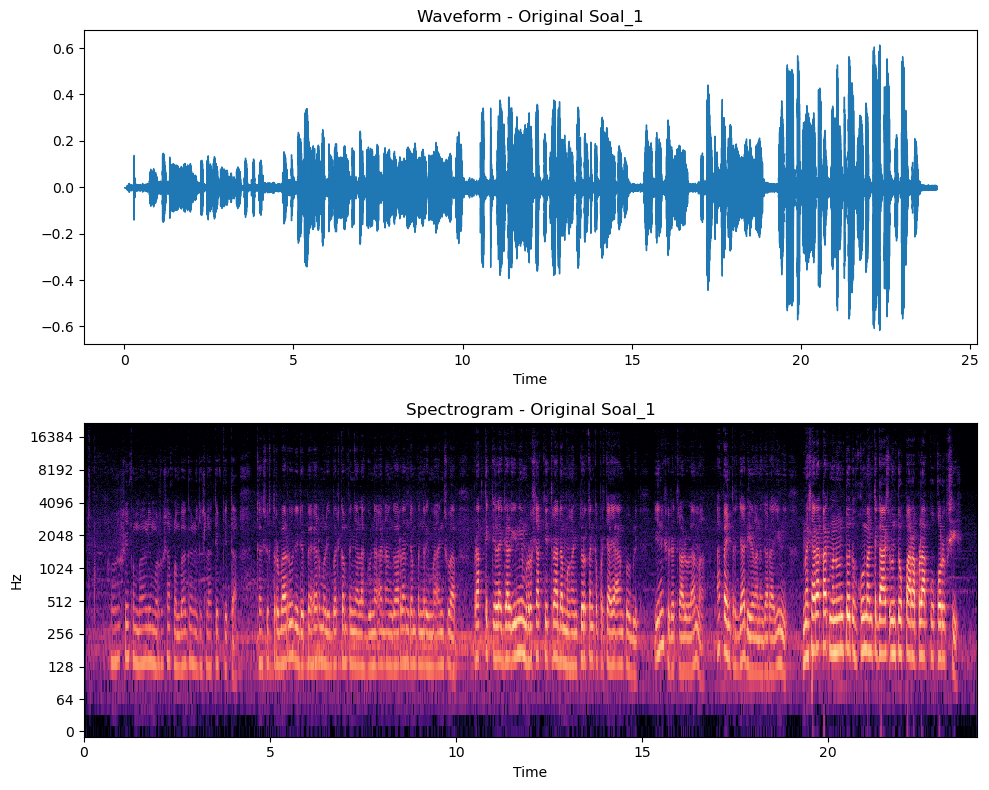

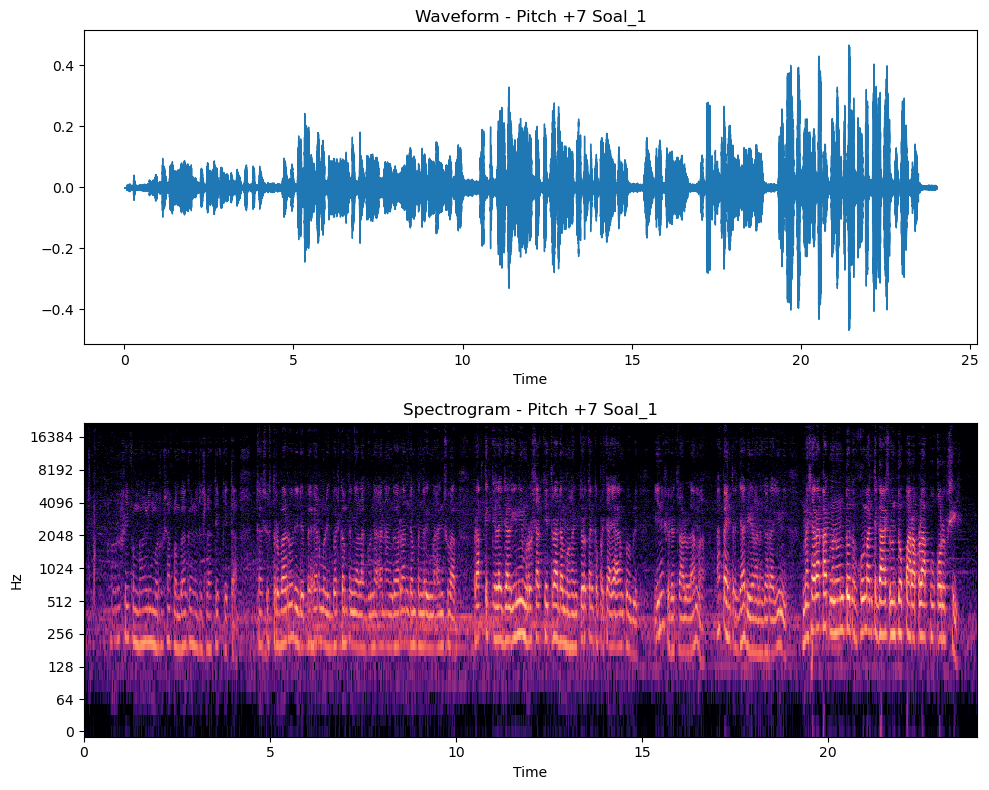

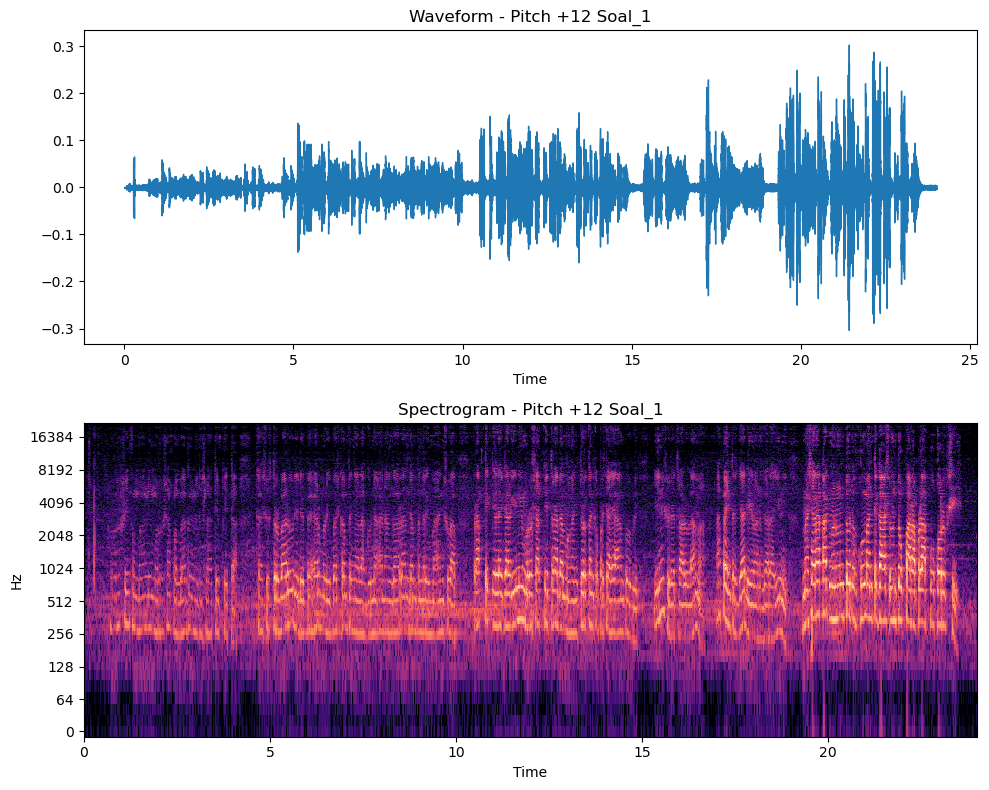

In [13]:
# Visualisasi sebelum dan sesudah pitch shifting untuk Soal_1
plot_waveform_and_spectrogram(y_1, sr_1, 'Original Soal_1')
plot_waveform_and_spectrogram(y_1_pitch7, sr_1, 'Pitch +7 Soal_1')
plot_waveform_and_spectrogram(y_1_pitch12, sr_1, 'Pitch +12 Soal_1')

***Analisis Pitch Shifting untuk Soal_1***

**Soal_1:**

 1. *Parameter yang Digunakan*
- Pada Soal_1.wav, dilakukan pitch shifting pada dua level:
  - Pitch +7 semitone: Meningkatkan nada suara sebanyak 7 semitone.
  - Pitch +12 semitone: Meningkatkan nada suara sebanyak 12 semitone (sekitar satu oktaf lebih tinggi).

2. *Perbedaan dalam Representasi Visual*

- Waveform Soal_1:
  - Original: Pada gambar pertama, waveform dari suara asli (Soal_1) menunjukkan gelombang yang bervariasi secara signifikan. Variasi amplitudo yang besar menandakan perubahan dinamis pada suara.
  - Pitch +7: Setelah pitch shifting sebesar +7 semitone, waveform (gambar ketiga) menjadi lebih rapat dan menunjukkan amplitudo yang lebih tinggi pada bagian atas, menandakan perubahan pitch yang membuat suara lebih tinggi tetapi tidak terlalu drastis.
  - Pitch +12: Pada gambar kelima, perubahan yang lebih besar terlihat pada waveform setelah pitch shifting +12. Gelombang suara menjadi lebih rapat dan tipis, menciptakan efek suara yang lebih tajam dan lebih cepat.

- Spectrogram Soal_1:
  - **Original: Pada gambar kedua, spektrogram menunjukkan distribusi energi yang lebih banyak di frekuensi rendah, menunjukkan suara asli dengan frekuensi rendah yang dominan.
  - Pitch +7: Pada gambar keempat, setelah pitch shifting +7, distribusi energi bergeser sedikit ke atas (frekuensi yang lebih tinggi), tetapi masih tidak terlalu jauh dari distribusi asli.
  - Pitch +12: Pada gambar keenam, distribusi energi pada spektrogram terfokus lebih tinggi pada frekuensi yang lebih tinggi, menandakan perubahan pitch yang lebih dramatis.

3. *Pengaruh Perubahan Pitch terhadap Kualitas dan Kejelasan Suara*

- Pitch +7:
  - Kualitas: Pitch shift sebesar +7 semitone membuat suara lebih cerah dan lebih tinggi tanpa mengubah kualitas secara signifikan. Suara tetap terjaga dan tidak banyak terdistorsi.
  - Kejelasan: Suara masih jelas dan mudah dikenali setelah pitch shifting +7 semitone, meskipun ada perubahan pada karakteristik suara. Efeknya tidak mengurangi kejelasan secara signifikan.

- Pitch +12:
  - Kualitas: Dengan pitch shifting +12 semitone, suara menjadi lebih tinggi dan tipis, mirip dengan suara chipmunk. Efek ini membuat suara terdengar lebih tajam dan lebih cepat, namun kualitas suara sedikit berkurang karena perubahan frekuensi yang besar.
  - Kejelasan: Pada pitch +12, meskipun suara masih dapat dipahami, kejelasan suara berkurang sedikit karena pergeseran frekuensi yang sangat besar. Beberapa elemen suara seperti intonasi bisa terdengar lebih sulit dipahami.

---

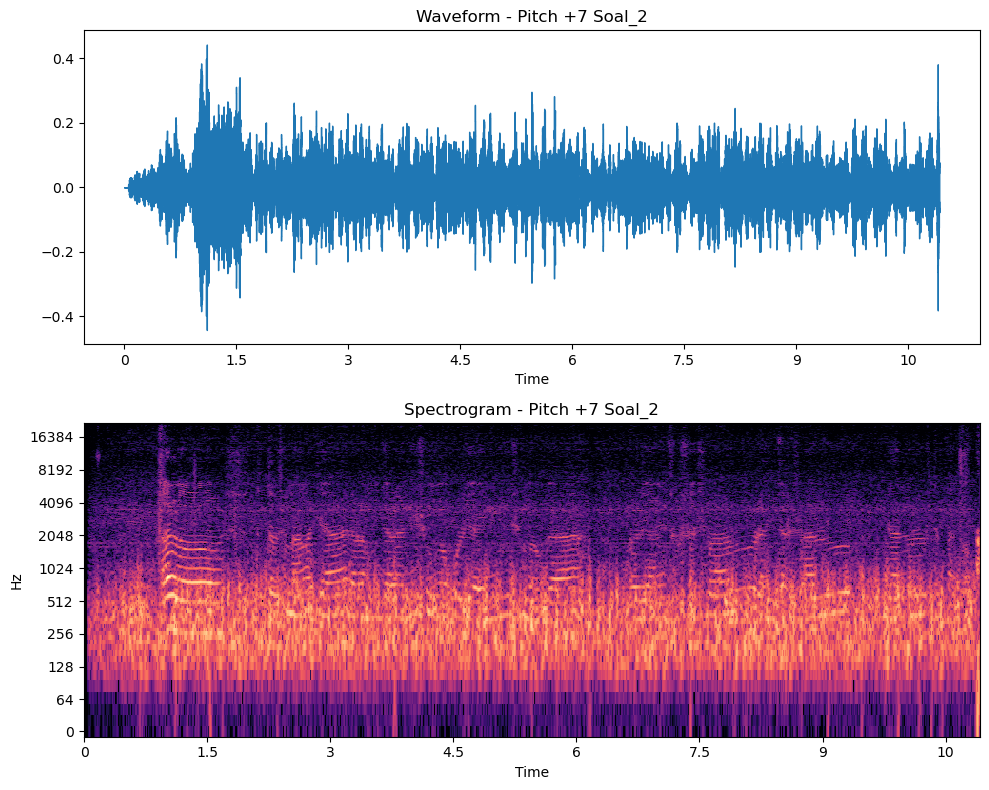

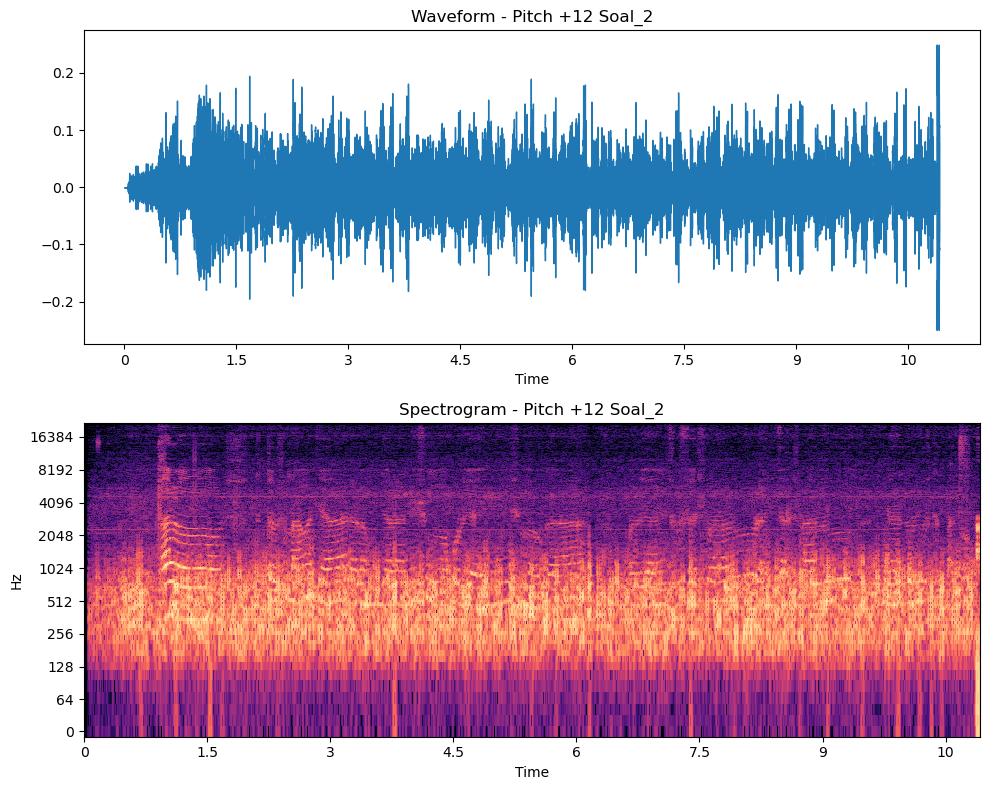

In [14]:
# Visualisasi sebelum dan sesudah pitch shifting untuk Soal_2
plot_waveform_and_spectrogram(y_2, sr_2, 'Original Soal_2')
plot_waveform_and_spectrogram(y_2_pitch7, sr_2, 'Pitch +7 Soal_2')
plot_waveform_and_spectrogram(y_2_pitch12, sr_2, 'Pitch +12 Soal_2')

***Analisis Pitch Shifting untuk Soal_2***

 **Soal_2:**

1. *Parameter yang Digunakan*
- Pada Soal_2.wav, pitch shifting dilakukan pada dua level yang sama seperti pada Soal_1:
  - Pitch +7 semitone: Meningkatkan nada suara sebanyak 7 semitone.
  - Pitch +12 semitone: Meningkatkan nada suara sebanyak 12 semitone (sekitar satu oktaf lebih tinggi).

2. *Perbedaan dalam Representasi Visual*

- Waveform Soal_2:
  - Original: Pada gambar kesembilan, waveform dari suara asli (Soal_2) menunjukkan gelombang dengan variasi amplitudo yang cukup besar, seperti pada Soal_1.
  - Pitch +7: Setelah pitch shifting +7 semitone (gambar kesebelas), waveform menjadi lebih rapat dan lebih tinggi, dengan perbedaan yang lebih halus dibandingkan dengan perubahan yang terlihat di Soal_1.
  - Pitch +12: Pada gambar ketiga belas, setelah pitch shifting +12, waveform menjadi lebih rapat dan tipis, menunjukkan perubahan pitch yang lebih signifikan.

- Spectrogram Soal_2:
  - Original: Pada gambar keduabelas, spektrogram menunjukkan distribusi energi yang terpusat pada frekuensi rendah, serupa dengan Soal_1.
  - Pitch +7: Pada gambar keempat belas, distribusi energi sedikit bergeser ke frekuensi yang lebih tinggi, tetapi perubahan tidak terlalu besar.
  - Pitch +12: Pada gambar keenam belas, distribusi energi pada spektrogram bergeser lebih tinggi ke frekuensi yang lebih tinggi, menandakan efek pitch shifting yang lebih dramatis.

3. *Pengaruh Perubahan Pitch terhadap Kualitas dan Kejelasan Suara*

- Pitch +7:
  - Kualitas: Pitch shift sebesar +7 semitone memberikan efek suara yang lebih cerah dan lebih cepat, tetapi kualitas suara tetap baik dan tidak terdistorsi. Suara masih terasa alami dan tidak banyak berubah.
  - Kejelasan: Kejelasan suara tetap terjaga dengan baik pada pitch +7 semitone. Suara tidak terlalu terdistorsi, meskipun ada perubahan nada.

- Pitch +12:
  - Kualitas: Dengan pitch shift +12 semitone, suara menjadi lebih tinggi dan lebih cepat, menciptakan efek suara chipmunk. Kualitas suara sedikit menurun, karena frekuensi yang sangat tinggi.
  - Kejelasan: Pada pitch +12, suara tetap dapat dipahami, tetapi kejelasan menurun sedikit karena perubahan pitch yang signifikan. Beberapa elemen suara menjadi lebih sulit dikenali, terutama pada artikulasi atau kata-kata tertentu.

---

In [15]:
# 4. Gabungkan File Audio
# Menggunakan soundfile untuk menyimpan file pitch-shifted
sf.write('Soal_1_pitch7.wav', y_1_pitch7, sr_1)
sf.write('Soal_1_pitch12.wav', y_1_pitch12, sr_1)

sf.write('Soal_2_pitch7.wav', y_2_pitch7, sr_2)
sf.write('Soal_2_pitch12.wav', y_2_pitch12, sr_2)

# Menggunakan Pydub untuk menggabungkan semua file audio
audio1 = AudioSegment.from_wav('Soal_1_pitch7.wav')
audio2 = AudioSegment.from_wav('Soal_1_pitch12.wav')
audio3 = AudioSegment.from_wav('Soal_2_pitch7.wav')
audio4 = AudioSegment.from_wav('Soal_2_pitch12.wav')

# Gabungkan semua audio ke dalam satu file
combined = audio1 + audio2 + audio3 + audio4
combined.export('combined_audio.wav', format='wav')

print("Proses pitch shifting selesai, dan file audio berhasil digabungkan.")

Proses pitch shifting selesai, dan file audio berhasil digabungkan.


## Soal 4: Audio Processing Chain

**Proses Tambahan (Equalizer, Gain, Normalization, Compression, Noise Gate, Silence Trimming)**

In [16]:
# Muat file audio gabungan yang sudah di-pitch shift dan diubah
file_path = 'combined_audio.wav'  # Menggunakan file gabungan langsung

# Muat audio dengan librosa
y_combined, sr_combined = librosa.load(file_path, sr=None)


In [17]:
# 5.1. Equalizer (Filter Low-Pass untuk mengurangi frekuensi tinggi)
# Menggunakan pydub AudioSegment untuk memprosesnya
audio = AudioSegment.from_wav(file_path)
audio = audio.low_pass_filter(5000)  # Filter low-pass untuk mengurangi frekuensi tinggi

In [18]:
# 5.2. Gain (peningkatan volume)
audio_gain = audio + 6  # Menambahkan gain sebesar 6dB

In [19]:
# Tentukan meteran loudness dengan pyloudnorm
meter = pyln.Meter(sr_combined)

# Hitung loudness audio saat ini
loudness = meter.integrated_loudness(y_combined)

# Tentukan loudness target yang diinginkan, misalnya -16 LUFS
target_loudness = -16.0  # Target loudness in LUFS
loudness_difference = target_loudness - loudness

# Terapkan perubahan loudness dengan menghindari clipping
y_normalized = pyln.normalize.loudness(y_combined, loudness, target_loudness)

c:\Users\josia\miniconda3\envs\breathenv\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


In [20]:
# 5.4. Compression (Menggunakan efek dynamic range compression)
compressed_audio = compress_dynamic_range(audio_gain)  # Kompresi dinamis

In [21]:
# 5.5. Noise Gate
# Menggunakan noise gate dengan ambang -40 dB
audio_noisy_gate = audio.split_to_mono()[0].apply_gain_stereo(0, -40)

In [22]:
# 5.6. Silence Trimming
# Menghapus bagian silence yang berada di awal dan akhir rekaman
trimmed_audio = audio.strip_silence(silence_len=1000, silence_thresh=-40)

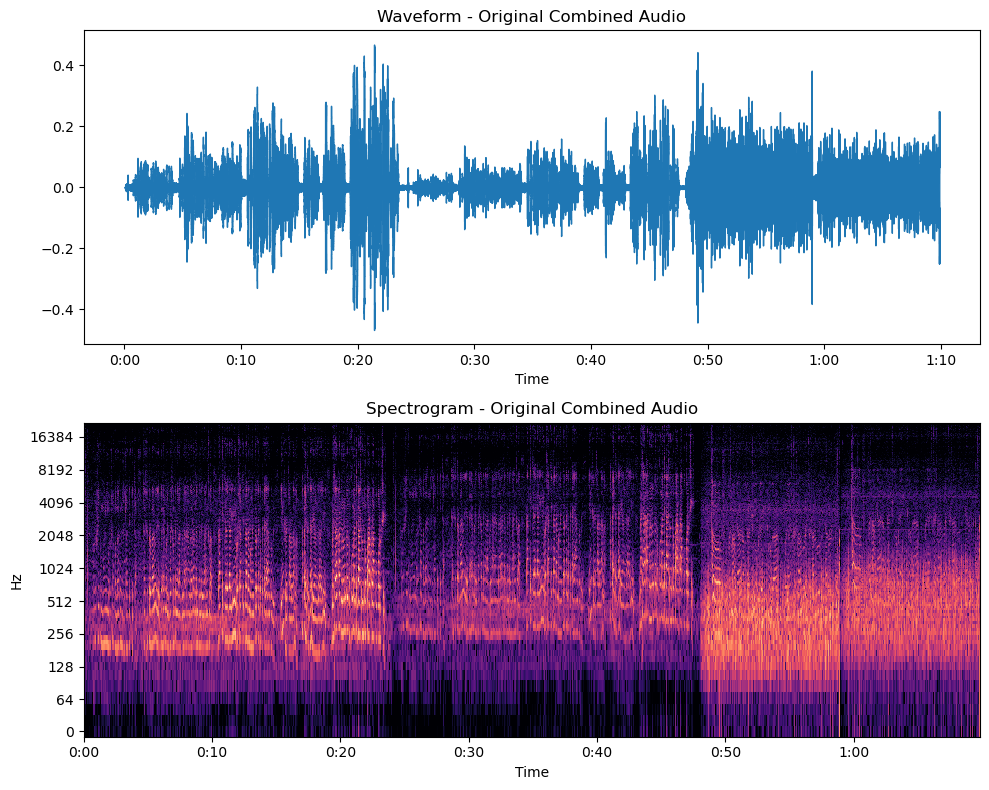

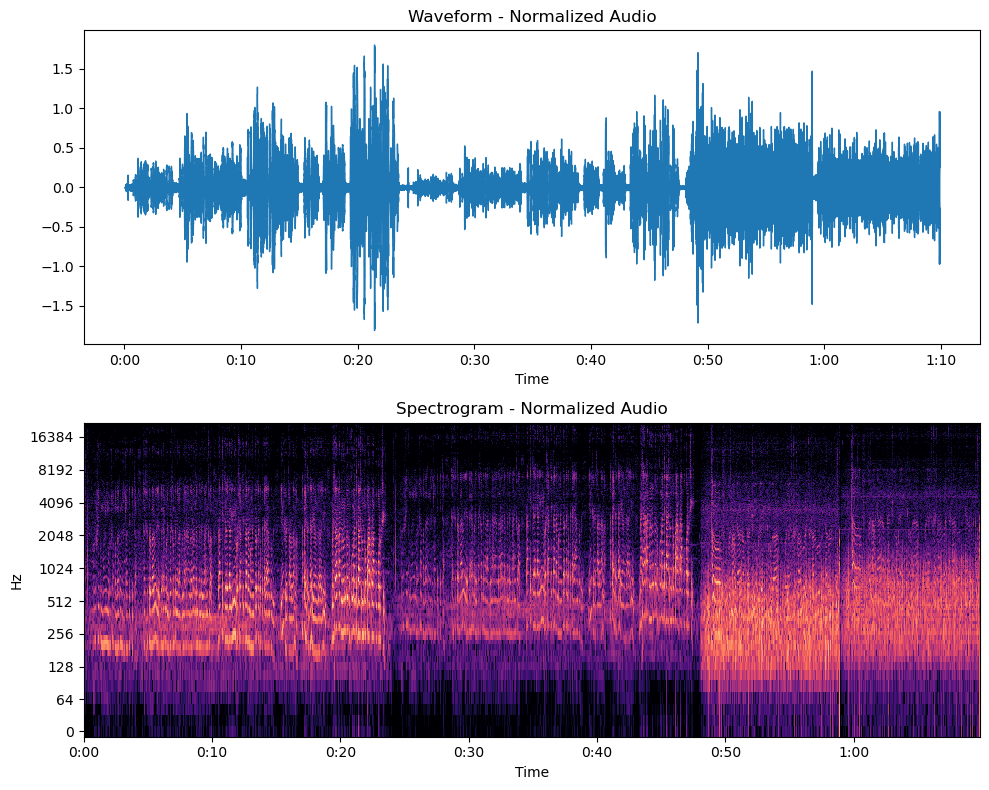

Proses selesai, dan file audio telah diproses dan disimpan sebagai 'final_processed_audio.wav'.


In [23]:
# ========================================
# 6. Visualisasi sebelum dan sesudah normalisasi
# ========================================

# Visualisasi audio asli dan audio setelah normalisasi
def plot_waveform_and_spectrogram(y, sr, title):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Plot Waveform
    ax[0].set(title=f'Waveform - {title}')
    librosa.display.waveshow(y, sr=sr, ax=ax[0])

    # Plot Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr, ax=ax[1])
    ax[1].set(title=f'Spectrogram - {title}')

    plt.tight_layout()
    plt.show()

# Visualisasi sebelum normalisasi (waveform dan spektrogram)
plot_waveform_and_spectrogram(y_combined, sr_combined, 'Original Combined Audio')

# Visualisasi setelah normalisasi
plot_waveform_and_spectrogram(y_normalized, sr_combined, 'Normalized Audio')

# Simpan hasil akhir yang telah diproses dalam satu file
sf.write('final_processed_audio.wav', y_normalized, sr_combined)

print("Proses selesai, dan file audio telah diproses dan disimpan sebagai 'final_processed_audio.wav'.")

***Analisis Hasil Proses Normalisasi dan Loudness Optimization***

*1. Perubahan Dinamika Suara yang Terjadi*
Proses **normalisasi** dan **pengoptimalan loudness** membawa perubahan yang jelas dalam dinamika suara. Sebelum normalisasi, kita melihat variasi besar dalam level volume suara yang tercatat dalam **waveform** dan **spectrogram**. Setelah normalisasi, seperti yang terlihat pada gambar kedua, waveform menjadi lebih seragam, dan **level volume** suara lebih konsisten sepanjang rekaman.

- Waveform: Pada rekaman asli, level puncak suara tidak terdistribusi secara merata, dengan beberapa bagian yang sangat keras dan lainnya lebih lembut. Setelah normalisasi, suara tampak lebih "rata", dengan level yang lebih seimbang.
- Spectrogram: Setelah normalisasi, terlihat bahwa intensitas frekuensi terdistrubusi lebih merata, dengan bagian yang lebih konsisten dalam hal kekuatan sinyal (warna oranye pada spektrum).

*2. Perbedaan Antara Normalisasi Peak dan Normalisasi LUFS*
- Normalisasi Peak mengatur level tertinggi (peak) dari audio agar berada pada nilai tertentu (misalnya, -0.1 dB). Ini berarti hanya puncak audio yang dikendalikan, dan dinamika audio lainnya tetap utuh. Normalisasi Peak lebih fokus pada level puncak dan dapat menyebabkan distorsi jika audio memiliki puncak yang sangat tinggi.
  
- Normalisasi LUFS (Loudness Units relative to Full Scale) mengukur loudness keseluruhan audio berdasarkan persepsi pendengaran manusia, mengkompensasi variasi dalam dinamika dan memberikan volume keseluruhan yang lebih konsisten. Dengan menargetkan **-16 LUFS** seperti yang dilakukan di sini, level loudness audio lebih terkontrol secara keseluruhan, tidak hanya pada puncaknya. Ini sangat bermanfaat untuk streaming atau broadcasting, di mana konsistensi loudness penting.

*3. Bagaimana Kualitas Suara Berubah Setelah Proses Normalisasi dan Loudness Optimization*
Setelah normalisasi LUFS, kualitas suara mengalami perubahan signifikan:
- Keseimbangan volume: Suara menjadi lebih stabil sepanjang rekaman, dengan bagian yang lebih tenang menjadi lebih terdengar jelas tanpa ada distorsi.
- Distorsi dan Clipping: Jika sebelumnya volume audio sangat bervariasi, setelah normalisasi, suara lebih "terkendali" dan mengurangi potensi clipping (distorsi yang terjadi ketika level audio terlalu tinggi).
- Kejelasan: Setelah normalisasi, meskipun tidak ada peningkatan volume pada bagian yang sangat lembut, kualitas suara secara keseluruhan menjadi lebih mudah dipahami dan tidak terdengar terlalu keras atau terlalu lemah pada bagian tertentu.

*4. Kelebihan dan Kekurangan Pengoptimalan Loudness dalam Konteks Rekaman Suara*
Kelebihan:
- Konsistensi Volume: Dengan menargetkan loudness yang standar (seperti **-16 LUFS**), audio menjadi lebih stabil dan nyaman didengar tanpa fluktuasi volume yang besar.
- Keseragaman untuk Platform Streaming: Pengoptimalan loudness sangat berguna ketika audio diputar di berbagai platform, di mana standar loudness (seperti **-16 LUFS**) diterapkan untuk memastikan suara konsisten antara berbagai konten.
- Kualitas Audio yang Lebih Baik: Pengurangan clipping dan distorsi membantu menjaga kualitas audio tanpa suara yang pecah.

Kekurangan:
- Kehilangan Dinamika: Jika diterapkan secara berlebihan, proses loudness optimization bisa mengurangi **dinamika alami** rekaman. Audio yang terlalu dinormalisasi bisa kehilangan variasi antara suara keras dan lembut, menjadikannya terasa "datar".
- Over-Compression: Dalam beberapa kasus, terutama dengan kompresi yang berlebihan, loudness optimization dapat membuat suara terdengar lebih sempit dan kehilangan kedalaman atau karakter suara aslinya.
- Proses yang Memerlukan Waktu: Proses optimisasi loudness dan normalisasi membutuhkan perhatian lebih untuk memastikan kualitas suara tetap optimal, dan bisa menjadi lebih memakan waktu dibandingkan hanya memfokuskan pada **peak normalization**.

**Kesimpulan:**
Proses normalisasi dengan menargetkan **-16 LUFS** memberikan keuntungan besar dalam hal stabilitas dan konsistensi volume, yang sangat bermanfaat untuk konten yang akan diputar di berbagai platform. Namun, perlu diperhatikan bahwa pengoptimalan loudness yang berlebihan bisa mengorbankan dinamika alami dan kedalaman suara. Sebaiknya, loudness optimization dilakukan dengan hati-hati untuk memastikan kualitas suara yang tetap alami dan tidak kehilangan elemen penting dari rekaman suara aslinya.


## Soal 5: Music Analysis dan Remix

Tempo Lagu 1: [135.99917763] BPM, Kunci Lagu 1: D
Tempo Lagu 2: [93.96306818] BPM, Kunci Lagu 2: C#


C:\Users\josia\AppData\Local\Temp\ipykernel_12356\2936988266.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_samples = int(len(lagu_2) * stretch_factor)


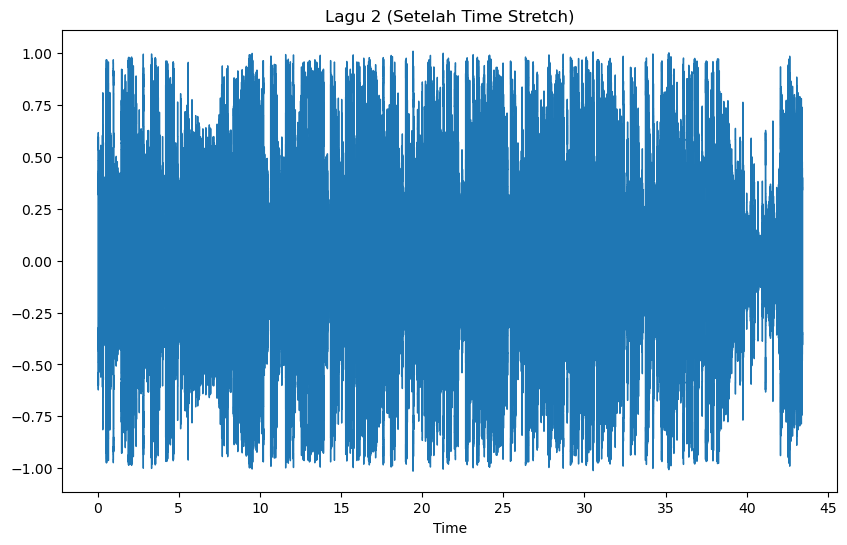

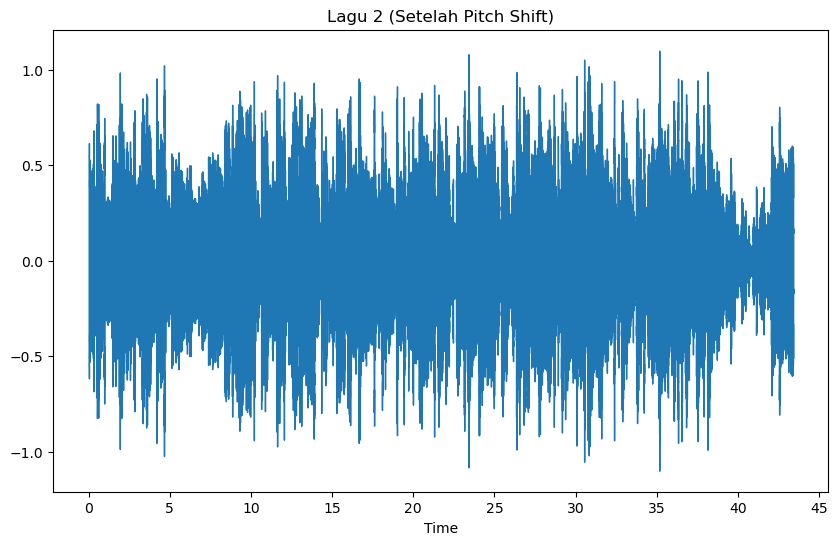

Proses crossfade selesai! File hasil gabungan disimpan sebagai 'final_remix_with_crossfade.wav'.


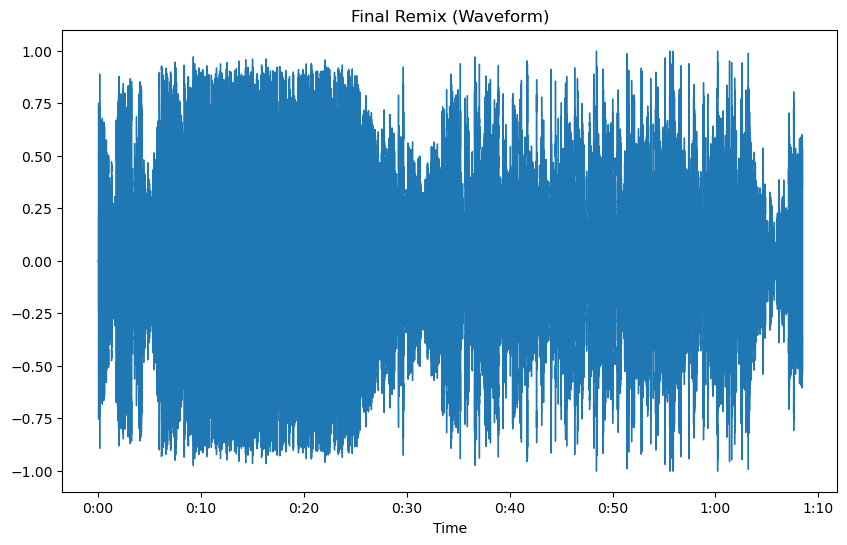

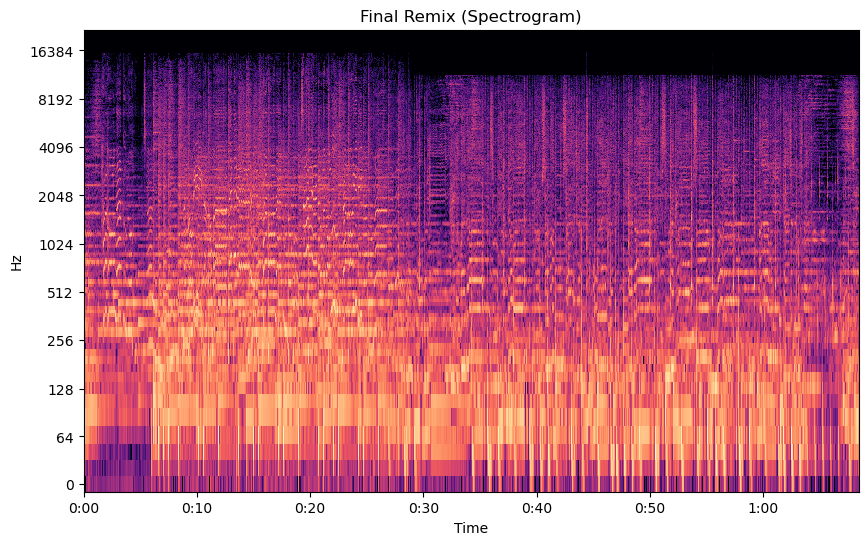

In [27]:
# =======================================
# 1. Memuat file lagu
# =======================================
lagu_1_path = 'Lagu_1_Lambat.wav'  # Ganti dengan path file Anda
lagu_2_path = 'Lagu_2_Cepat.wav'   # Ganti dengan path file Anda

# Memuat audio ke dalam array numpy
lagu_1, sr_1 = librosa.load(lagu_1_path, sr=None)
lagu_2, sr_2 = librosa.load(lagu_2_path, sr=None)

# =======================================
# 2. Deteksi Tempo (BPM) dan Kunci (Key)
# =======================================
# Deteksi tempo (BPM) dari kedua lagu
tempo_1, _ = librosa.beat.beat_track(y=lagu_1, sr=sr_1)  # Tempo untuk lagu 1
tempo_2, _ = librosa.beat.beat_track(y=lagu_2, sr=sr_2)  # Tempo untuk lagu 2

# Estimasi kunci (key) untuk kedua lagu menggunakan Harmonic Product Spectrum (HPS)
def estimate_key(y, sr):
    chroma = librosa.feature.chroma_cens(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    key_index = np.argmax(chroma_mean)
    keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    return keys[key_index]

key_1 = estimate_key(lagu_1, sr_1)
key_2 = estimate_key(lagu_2, sr_2)

print(f"Tempo Lagu 1: {tempo_1} BPM, Kunci Lagu 1: {key_1}")
print(f"Tempo Lagu 2: {tempo_2} BPM, Kunci Lagu 2: {key_2}")

# =======================================
# 3. Time Stretch: Menyamakan Tempo
# =======================================
# Hitung stretch factor untuk menyamakan tempo
stretch_factor = tempo_1 / tempo_2

# Hitung jumlah sampel yang perlu diubah berdasarkan stretch factor
num_samples = int(len(lagu_2) * stretch_factor)

# Resample untuk time stretching menggunakan scipy.signal.resample
lagu_2_stretched = scipy.signal.resample(lagu_2, num_samples)

# Visualisasi waveform setelah time-stretch
plt.figure(figsize=(10, 6))
librosa.display.waveshow(lagu_2_stretched, sr=sr_2)
plt.title("Lagu 2 (Setelah Time Stretch)")
plt.show()

# =======================================
# 4. Pitch Shift: Menyamakan Kunci
# =======================================
# Menghitung perbedaan semitone antara dua kunci
key_map = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
n_steps_2 = key_map[key_1] - key_map[key_2]  # Kunci lagu 2 diubah untuk menyesuaikan dengan kunci lagu 1

# Pitch shift lagu 2 untuk menyesuaikan dengan kunci lagu 1
pitch_shifted_lagu_2 = librosa.effects.pitch_shift(lagu_2_stretched, sr=sr_2, n_steps=n_steps_2)

# Visualisasi waveform setelah pitch shift
plt.figure(figsize=(10, 6))
librosa.display.waveshow(pitch_shifted_lagu_2, sr=sr_2)
plt.title("Lagu 2 (Setelah Pitch Shift)")
plt.show()

# =======================================
# 5. Crossfading: Menggabungkan Lagu
# =======================================
# Simpan file sementara untuk crossfade menggunakan pydub
sf.write('lagu_1_processed.wav', lagu_1, sr_1)  # Simpan lagu 1 yang belum diproses
sf.write('lagu_2_processed.wav', pitch_shifted_lagu_2, sr_2)  # Simpan lagu 2 yang telah diproses

# Muat file audio yang sudah diubah
audio_lagu_1 = AudioSegment.from_wav('lagu_1_processed.wav')
audio_lagu_2 = AudioSegment.from_wav('lagu_2_processed.wav')

# Gabungkan kedua lagu dengan crossfade
combined_audio = audio_lagu_1.append(audio_lagu_2, crossfade=5000)  # 5 detik crossfade

# Simpan hasil audio gabungan
combined_audio.export('final_remix_with_crossfade.wav', format='wav')

print("Proses crossfade selesai! File hasil gabungan disimpan sebagai 'final_remix_with_crossfade.wav'.")

# =======================================
# Visualisasi hasil Remix (Waveform & Spectrogram)
# =======================================
# Muat kembali audio gabungan untuk visualisasi
final_audio, sr_final = librosa.load('final_remix_with_crossfade.wav', sr=None)

# Visualisasi waveform
plt.figure(figsize=(10, 6))
librosa.display.waveshow(final_audio, sr=sr_final)
plt.title("Final Remix (Waveform)")
plt.show()

# Visualisasi spektrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(final_audio)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr_final)
plt.title("Final Remix (Spectrogram)")
plt.show()


**Analisis Remix Lagu**

Pada percakapan ini, dua buah lagu telah diproses untuk disesuaikan dalam tempo, kunci, dan transisi yang mulus menggunakan teknik audio processing. Berikut adalah penjelasan lengkap mengenai langkah-langkah yang telah diambil.

*1. Time Stretch (Lagu 2)*
- Tujuan: Menyamakan tempo Lagu 2 dengan Lagu 1 yang lebih lambat.
- Parameter:
  - Stretch Factor dihitung berdasarkan perbandingan tempo antara Lagu 1 dan Lagu 2.
  - Rate digunakan untuk mengubah durasi Lagu 2 agar sesuai dengan tempo Lagu 1.
- Hasil:
  - Waveform setelah time-stretch menunjukkan perpanjangan durasi Lagu 2.
  - Spectrogram memperlihatkan perubahan dalam frekuensi sepanjang durasi lagu setelah diubah.

Visualisasi:
- Waveform dan Spectrogram menunjukkan perpanjangan waktu pada segmen-segmen tertentu setelah proses time-stretch.

*2. Pitch Shift (Lagu 2)*
- Tujuan: Menyesuaikan kunci (key) Lagu 2 agar sesuai dengan kunci Lagu 1.
- Parameter:
  - Semitone dihitung berdasarkan perbedaan antara kunci Lagu 1 dan Lagu 2.
- Hasil:
  - Lagu 2 disesuaikan untuk berada pada kunci yang sama dengan Lagu 1.
  - Spectrogram menunjukkan pergeseran frekuensi tinggi dan rendah, mengindikasikan perubahan pitch.

Visualisasi:
- Waveform dan **Spectrogram setelah pitch shifting memperlihatkan perubahan frekuensi akibat penyesuaian kunci.

## 3. Crossfading
- Tujuan: Menggabungkan kedua lagu dengan transisi yang mulus antara Lagu 1 dan Lagu 2.
- Proses:
  - Pada akhir Lagu 1, volume dikurangi secara bertahap, dan pada awal Lagu 2, volume dinaikkan secara bertahap untuk menciptakan transisi yang halus.
- Hasil:
  - Waveform menunjukkan penggabungan dua lagu dengan transisi volume yang mulus.
  - Spectrogram memperlihatkan penggabungan dua lagu dengan perubahan frekuensi yang halus di bagian tengah.

Visualisasi:
- Final Remix (Waveform) dan Spectrogram menunjukkan transisi yang halus antara kedua lagu.


**Hasil Remix**
- Waveform dan Spectrogram menunjukkan bahwa kedua lagu sekarang berada pada tempo dan kunci yang sama, dengan transisi halus di antara keduanya berkat efek crossfading.
- Pitch shifting memberikan perubahan yang terlihat pada spectrogram dengan pergeseran frekuensi, sementara time-stretching memperpanjang durasi Lagu 2 untuk mencocokkan tempo Lagu 1.
  
**Kelebihan dan Kekurangan dari Remix**
Kelebihan:
- Harmoni antara kedua lagu: Proses time-stretching dan pitch-shifting memungkinkan kedua lagu disesuaikan agar berbaur lebih harmonis.
- Transisi mulus: Efek crossfading memastikan transisi antara kedua lagu menjadi halus, tanpa ada jeda yang mencolok.

Kekurangan:
- Penyimpangan kualitas suara: Proses time-stretching yang berlebihan atau pitch-shifting yang ekstrem dapat mengubah karakter suara dan menghasilkan distorsi.
- Keterbatasan dalam perubahan besar: Jika perbedaan tempo atau kunci terlalu besar, kualitas suara bisa terganggu.

Secara keseluruhan, proses remix ini berhasil menyatukan kedua lagu dengan cara yang harmonis, meskipun dengan beberapa trade-off pada kualitas suara tergantung pada besarnya perubahan yang diterapkan.


Link GPT : https://chatgpt.com/share/e/68f27615-6374-800d-887b-149ed8c08941 